In [ ]:
## Test paho and tkinter
## !pip install paho-mqtt
# http://www.steves-internet-guide.com/into-mqtt-python-client/
# tkinter is preinstalled with Python distribution

In [3]:
import paho.mqtt.client as mqtt
# import ssl

In [4]:
Client_ID = "6740ee15-1cf4-405d-883c-1edcd8a3d350"
User = "ArJUFe3L6jX1ibHJ785B36p4Wnttmdvt"
Password = "M-TXJt6C2JvaSIe)uks05961lHAIlvzT"
client = mqtt.Client(client_id=Client_ID,
                         transport='tcp',
                         protocol=mqtt.MQTTv311,
                         clean_session=True)
client.username_pw_set(User,Password)

In [5]:
broker = "broker.netpie.io"
myport = 1883
client.connect(broker, port=myport, keepalive=60)

0

In [ ]:
client.disconnect()

In [ ]:
client.subscribe("@msg/update")

In [ ]:
client.subscribe("@msg/shadowdata")

In [ ]:
def on_message(client, userdata, message):
    global rcvd_msg, rcvd_topic
    rcvd_msg = str(message.payload.decode("utf-8"))
    rcvd_topic = message.topic
    print("message received ", rcvd_msg)
    print("message topic=",message.topic)

In [ ]:
client.on_message=on_message

In [ ]:
client.loop_start()

In [ ]:
client.loop_stop()

In [16]:
kp = 6.7
cmd_str = "kp="+str(kp)
client.publish("@msg/cmd",cmd_str)

message received  0.05,0,200,0,1,0,0,0,6.7,2.891455,2.609558,0.0,1.0,1.0,50.0
message topic= @msg/update
message received  0.5,0.501,0.5412537
message topic= @msg/shadowdata
message received  0.5,0.499,0.6146764
message topic= @msg/shadowdata
message received  0.5,0.501,0.4946878
message topic= @msg/shadowdata
message received  0.5,0.501,0.4834673
message topic= @msg/shadowdata
message received  0.5,0.501,0.4796889
message topic= @msg/shadowdata
message received  0.5,0.498,0.669612
message topic= @msg/shadowdata
message received  0.5,0.5,0.5428964
message topic= @msg/shadowdata
message received  0.5,0.499,0.5419723
message topic= @msg/shadowdata
message received  0.5,0.499,0.6221223
message topic= @msg/shadowdata
message received  0.5,0.501,0.4786441
message topic= @msg/shadowdata
message received  0.5,0.501,0.5461738
message topic= @msg/shadowdata
message received  0.5,0.498,0.4435457
message topic= @msg/shadowdata
message received  0.5,0.506,0.605867
message topic= @msg/shadowdata
me

In [17]:
client.publish("@msg/cmd","autotune")

message received  0.5,0.497,0.6060304
message topic= @msg/shadowdata
message received  0.5,0.501,0.4154058
message topic= @msg/shadowdata
message received  0.05,0,200,0,1,0,1,0,6.7,2.891455,2.609558,0.0,1.0,1.0,50.0
message topic= @msg/update
message received  0.5,0.62,2.65
message topic= @msg/shadowdata
message received  0.5,1.545,2.65
message topic= @msg/shadowdata
message received  0.5,1.827,0.65
message topic= @msg/shadowdata
message received  0.5,1.477,2.65
message topic= @msg/shadowdata
message received  0.5,1.824,0.65
message topic= @msg/shadowdata
message received  0.5,1.491,2.65
message topic= @msg/shadowdata
message received  0.5,1.812,0.65
message topic= @msg/shadowdata
message received  0.5,1.499,2.65
message topic= @msg/shadowdata
message received  0.05,0,200,0,1,0,0,0,6.7,2.891455,2.609558,0.0,1.0,1.0,50.0
message topic= @msg/update
message received  0.5,1.791,0.0
message topic= @msg/shadowdata
message received  0.5,1.287,0.0
message topic= @msg/shadowdata
message receive

In [ ]:
# use Queue
import queue
q = queue.Queue()

In [ ]:
# See the following cells if you want to use queue

In [ ]:
def on_message(client, userdata, message):
    q.put(message)
    
client.on_message=on_message

In [ ]:
client.subscribe("@msg/shadowdata")

In [ ]:
client.unsubscribe("@msg/shadowdata")

In [ ]:
while not q.empty():
    message = q.get()
    if message is None:
        continue
    print("received from queue",str(message.payload.decode("utf-8")))

### tkinter development

In [ ]:
# class example
from tkinter import *
from tkinter import ttk

class FeetToMeters:

    def __init__(self, root):

        root.title("Feet to Meters")

        mainframe = ttk.Frame(root, padding="3 3 12 12")
        mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
        root.columnconfigure(0, weight=1)
        root.rowconfigure(0, weight=1)
       
        self.feet = StringVar()
        feet_entry = ttk.Entry(mainframe, width=7, textvariable=self.feet)
        feet_entry.grid(column=2, row=1, sticky=(W, E))
        self.meters = StringVar()

        ttk.Label(mainframe, textvariable=self.meters).grid(column=2, row=2, sticky=(W, E))
        ttk.Button(mainframe, text="Calculate", command=self.calculate).grid(column=3, row=3, sticky=W)

        ttk.Label(mainframe, text="feet").grid(column=3, row=1, sticky=W)
        ttk.Label(mainframe, text="is equivalent to").grid(column=1, row=2, sticky=E) 
        ttk.Label(mainframe, text="meters").grid(column=3, row=2, sticky=W)

        for child in mainframe.winfo_children(): 
            child.grid_configure(padx=5, pady=5)

        feet_entry.focus()
        root.bind("<Return>", self.calculate)
        
    def calculate(self, *args):
        try:
            value = float(self.feet.get())
            self.meters.set(int(0.3048 * value * 10000.0 + 0.5)/10000.0)
        except ValueError:
            pass

root = Tk()
FeetToMeters(root)
root.mainloop()

In [1]:
# class implementation of IoT controller GUI
import paho.mqtt.client as mqtt
import tkinter as tk
from tkinter import *
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Connecting to mqtt broker
r = 0.5, y = 0.488, u = 0.6108814
r = 0.5, y = 0.484, u = 1.794504
r = 0.5, y = 0.502, u = 0.6476362
r = 0.5, y = 0.488, u = 0.4172889
r = 0.5, y = 0.514, u = 0.5117363
r = 0.5, y = 0.495, u = 0.5595674
r = 0.5, y = 0.488, u = 0.4673129
r = 0.5, y = 0.509, u = 0.4265803
r = 0.5, y = 0.498, u = 0.5048563
r = 0.5, y = 0.495, u = 0.515877
r = 0.5, y = 0.503, u = 0.5084743
r = 0.5, y = 0.496, u = 0.5539479
r = 0.5, y = 0.501, u = 0.5345963
r = 0.5, y = 0.498, u = 0.5408716
r = 0.5, y = 0.502, u = 0.4807849
r = 0.5, y = 0.498, u = 0.6430291
r = 0.5, y = 0.499, u = 0.5901093
r = 1.2, y = 0.64, u = 3.3
r = 1.2, y = 1.655, u = 0.0
r = 1.2, y = 1.242, u = 1.067847
r = 1.2, y = 1.082, u = 1.658609
r = 1.2, y = 1.3, u = 0.5352922
r = 1.2, y = 1.121, u = 1.906044
r = 1.2, y = 1.243, u = 0.4688402
r = 1.2, y = 1.184, u = 1.251925
r = 1.2, y = 1.201, u = 1.274504
r = 1.2, y = 1.206, u = 1.010659
r = 1.2, y = 1.191, u = 1.232987
r = 1.2, y = 1.207, u = 1.147942
r = 1.2, y = 

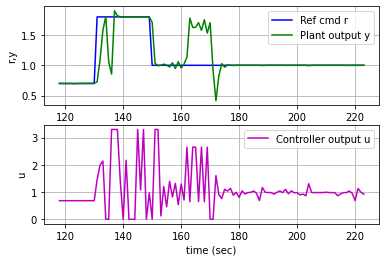

In [2]:
class IoTController:

    def __init__(self, root):
        
        screen_width = 800
        screen_height = 600
        self.TFont1 = ("Consolas",10)
        self.TFont2 = ("Consolas",12)
        
        root.title("IoT Controller")
        root.protocol("WM_DELETE_WINDOW", self.on_close)
        root.geometry(str(screen_width)+'x'+str(screen_height))
        mainframe = ttk.Frame(root, padding="3 3 12 12")
        mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
        root.columnconfigure(0, weight=1)
        root.rowconfigure(0, weight=1)
        cvrowspan = 6  # canvas row and column span
        cvcolspan = 3
        
        # string parameters corresponding to real parmeter values
        self.t_txt = StringVar()
        self.plantsim_txt = StringVar()
        self.datasize_txt = StringVar()
        self.capture_txt = StringVar()
        self.feedback_txt = StringVar()
        self.controller_txt = StringVar()
        self.autotune_txt = StringVar()
        self.lsid_txt = StringVar()
        self.kp_txt = StringVar()
        self.ki_txt = StringVar()
        self.kd_txt = StringVar()
        self.kt_txt = StringVar()
        self.wp_txt = StringVar()
        self.wd_txt = StringVar()
        self.N_txt = StringVar()        
        
        ttk.Label(mainframe, text="dew.ninja 2023", font=self.TFont2, foreground="blue").grid(column=3,row=8)
        # update parameters to current value
        ttk.Button(mainframe, text="Update", command=self.dbupdate).grid(column=0, row=cvrowspan+5, sticky=W)
        # r,y,u display 
        ryuframe = ttk.Frame(mainframe, padding = (2,2,2,2),relief="sunken")
        ryuframe.grid(column=0,row=cvrowspan+1)
        ttk.Label(ryuframe, text="r ", font=self.TFont1).grid(column=0, row=0, sticky=W)
        ttk.Label(ryuframe, text="y ",font=self.TFont1).grid(column=0, row=1, sticky=W)
        ttk.Label(ryuframe, text="u ",font=self.TFont1).grid(column=0, row=2, sticky=W)
        
        self.r_txt = StringVar()
        r_entry = ttk.Entry(ryuframe,width=7, textvariable=self.r_txt)
        r_entry.grid(column=1, row=0, sticky=(W, E))
        ttk.Button(ryuframe, text="Set", command=self.send_r).grid(column=2, row=0, sticky=W)

        self.y_txt = StringVar()
        self.u_txt = StringVar()
        ttk.Label(ryuframe, font=self.TFont1, foreground='blue',
                  textvariable=self.y_txt).grid(column=1, row=1, sticky=(W, E))
        ttk.Label(ryuframe, font=self.TFont1, foreground='green',
                  textvariable=self.u_txt).grid(column=1, row=2, sticky=(W, E))
        
        # feedback group
        fbframe = ttk.Frame(mainframe, padding = (2,2,2,2),relief="sunken")
        fbframe.grid(column=cvcolspan,row=0)        
        
        ttk.Label(fbframe, text="Feedback", font=self.TFont1,foreground='red').grid(column=0, row=0, sticky=W)        
        self.olrb = (ttk.Radiobutton(fbframe,text="Open-loop", variable=self.feedback_txt,
                                     value="0",command=self.send_cmd_fbopen).
                                     grid(column=0, row=1, sticky=W))
        self.clrb = (ttk.Radiobutton(fbframe, text="Closed-loop", variable=self.feedback_txt,
                                     value="1",command=self.send_cmd_fbclosed).
                                     grid(column=0, row=2, sticky=W))

        # controller group
        ctlframe = ttk.Frame(mainframe, padding = (2,2,2,2),relief="sunken")
        ctlframe.grid(column=cvcolspan,row=1)        
        
        ttk.Label(ctlframe, text="Controller", font=self.TFont1,foreground='magenta').grid(column=0, row=0, sticky=W)        
        self.pidrb = (ttk.Radiobutton(ctlframe,text="PID", variable=self.controller_txt,
                                      value="0",command=self.send_cmd_pid_control).grid(column=0, 
                                                                            row=1, sticky=W))
        self.ccrb = (ttk.Radiobutton(ctlframe, text="Custom", variable=self.controller_txt,
                                     value="1",command=self.send_cmd_cc_control).grid(column=0,
                                                                            row=2, sticky=W))
        self.sfbrb = (ttk.Radiobutton(ctlframe, text="SFBI", variable=self.controller_txt,
                                     value="2",command=self.send_cmd_sfbi_control).grid(column=0, 
                                                                            row=3, sticky=W))
        
        # PID group
        pidframe = ttk.Frame(mainframe, padding = (2,2,2,2),relief="sunken")
        pidframe.grid(column=cvcolspan,row=2,rowspan=6)                
        ttk.Label(pidframe, text="PID", font=self.TFont1,foreground='green').grid(column=0, row=0, sticky=W)        
        self.atbutton = (ttk.Button(pidframe, text="Autotune", command=self.send_cmd_at).grid(
                        column=1, row=0, sticky=W))
        # Kp scale
        ttk.Label(pidframe, text="Kp ",font=self.TFont1).grid(column=0, row=1, sticky=W)
        # note that tk scale is used instead of ttk here
        self.kpscale =(tk.Scale(pidframe, orient=HORIZONTAL,length=100, from_=0.1, to=20.0,
                        resolution=0.1, troughcolor="blue",variable=self.kp_txt))        
        self.kpscale.grid(column=1, row=1)
        # this is how the slider is executed only on release!
        self.kpscale.bind("<ButtonRelease-1>", self.send_cmd_kp)

        # Ki scale
        ttk.Label(pidframe, text="Ki ",font=self.TFont1).grid(column=0, row=2, sticky=W)
        self.kiscale =(tk.Scale(pidframe, orient=HORIZONTAL,length=100, from_=0.1, to=20.0,
                        resolution=0.1,troughcolor="red",variable=self.ki_txt))
        self.kiscale.grid(column=1, row=2)
        self.kiscale.bind("<ButtonRelease-1>", self.send_cmd_ki)

        # Kd scale
        ttk.Label(pidframe, text="Kd ",font=self.TFont1).grid(column=0, row=3, sticky=W)
        self.kdscale =(tk.Scale(pidframe, orient=HORIZONTAL,length=100, from_=0.1, to=20.0,
                        resolution=0.1,troughcolor="yellow",variable=self.kd_txt))
        self.kdscale.grid(column=1, row=3)
        self.kdscale.bind("<ButtonRelease-1>", self.send_cmd_kd)

        # Kt scale
        ttk.Label(pidframe, text="Kt ",font=self.TFont1).grid(column=0, row=4, sticky=W)
        self.ktscale =(tk.Scale(pidframe, orient=HORIZONTAL,length=100, from_=0.0, to=5.0,
                        resolution=0.1,troughcolor="white",variable=self.kt_txt))
        self.ktscale.grid(column=1, row=4)
        self.ktscale.bind("<ButtonRelease-1>", self.send_cmd_kt)
        
        # Wp scale
        ttk.Label(pidframe, text="Wp ",font=self.TFont1).grid(column=0, row=5, sticky=W)
        self.wpscale =(tk.Scale(pidframe, orient=HORIZONTAL,length=100, from_=0.0, to=1.0,
                        resolution=0.1,troughcolor="magenta",variable=self.wp_txt))
        self.wpscale.grid(column=1, row=5)
        self.wpscale.bind("<ButtonRelease-1>", self.send_cmd_wp)
        
        # Wd scale
        ttk.Label(pidframe, text="Wd ",font=self.TFont1).grid(column=0, row=6, sticky=W)
        self.wdscale =(tk.Scale(pidframe, orient=HORIZONTAL,length=100, from_=0.0, to=1.0,
                        resolution=0.1,troughcolor="cyan",variable=self.wd_txt))
        self.wdscale.grid(column=1, row=6)
        self.wdscale.bind("<ButtonRelease-1>", self.send_cmd_wd)

        # N scale
        ttk.Label(pidframe, text="N ",font=self.TFont1).grid(column=0, row=7, sticky=W)
        self.nscale =(tk.Scale(pidframe, orient=HORIZONTAL,length=100, from_=2, to=200,
                        resolution=1,troughcolor="black",variable=self.N_txt))
        self.nscale.grid(column=1, row=7)
        self.nscale.bind("<ButtonRelease-1>", self.send_cmd_N)

        # r,y,u time series plot
        self.time_step = 0.0
        self.time_vec = []
        self.y1_vec = []
        self.y2_vec = []
        self.y3_vec = []
       
        self.fig, self.axes  = plt.subplots(2,1)
        self.ax1, self.ax2 = self.fig.get_axes()
        self.canvas = FigureCanvasTkAgg(self.fig, master=mainframe)
        self.canvas.get_tk_widget().grid(row=0,column=0, rowspan=cvrowspan, columnspan=cvcolspan, sticky=W)
        self.an1 = FuncAnimation(self.fig, self.animate, interval=1000)

        

        for child in mainframe.winfo_children(): 
            child.grid_configure(padx=5, pady=5)
        
        self.Client_ID = "6740ee15-1cf4-405d-883c-1edcd8a3d350"
        self.User = "ArJUFe3L6jX1ibHJ785B36p4Wnttmdvt"
        self.Password = "M-TXJt6C2JvaSIe)uks05961lHAIlvzT"    
        self.broker = "broker.netpie.io"
        self.port = 1883     
        self.mqtt_connect()
        
        # controller parameter list. Values will be updated by ESP32
        self.r = 0.5
        self.y = 0.5
        self.u = 0.5
        self.t = 0.05
        self.plantsim = 0
        self.datasize = 200
        self.capture = 0
        self.feedback = 1
        self.controller = 0
        self.autotune = 0
        self.lsid = 0
        self.kp = 1.0
        self.ki = 1.0
        self.kd = 1.0
        self.kt = 0
        self.wp = 1
        self.wd = 1
        self.N = 20
        
        # flags
        self.show_r = True
        

    def mqtt_connect(self):
        print("Connecting to mqtt broker")
        try:
            self.client = mqtt.Client(client_id=self.Client_ID,
                         transport='tcp',
                         protocol=mqtt.MQTTv311,
                         clean_session=True)
            self.client.username_pw_set(self.User,self.Password)
            self.client.connect(self.broker, port=self.port, keepalive=60)
            self.client.subscribe("@msg/update")
            self.client.subscribe("@msg/shadowdata")
            self.client.on_message = self.on_message
            self.client.loop_start()
        except:
            print("Problem connecting to mqtt broker")

    def on_message(self,client, userdata, message):
        self.rcvd_msg = str(message.payload.decode("utf-8"))
        self.rcvd_topic = message.topic
        #print("message received ", self.rcvd_msg)
        #print("message topic=",message.topic)
        if self.rcvd_topic == "@msg/shadowdata":
            ryu_data = self.rcvd_msg.split(',')
            self.r = float(ryu_data[0])
            self.y = float(ryu_data[1])
            self.u = float(ryu_data[2])
            print("r = "+str(self.r)+", y = "+str(self.y)+", u = "+str(self.u))
            if self.show_r:
                self.r_txt.set(str(round(self.r,2)))
                self.show_r = False
            self.y_txt.set(str(round(self.y,3)))
            self.u_txt.set(str(round(self.u,3)))
            self.time_step += 1

        if self.rcvd_topic == "@msg/update":
            parm_data = self.rcvd_msg.split(',')
            # strings for GUI update
            self.t_txt.set(parm_data[0])
            self.plantsim_txt.set(parm_data[1]) 
            self.datasize_txt.set(parm_data[2])
            self.capture_txt.set(parm_data[3]) 
            self.feedback_txt.set(parm_data[4]) 
            self.controller_txt.set(parm_data[5]) 
            self.autotune_txt.set(parm_data[6])
            self.lsid_txt.set(parm_data[7])
            self.kp_txt.set(parm_data[8])
            self.ki_txt.set(parm_data[9]) 
            self.kd_txt.set(parm_data[10]) 
            self.kt_txt.set(parm_data[11])
            self.wp_txt.set(parm_data[12]) 
            self.wd_txt.set(parm_data[13]) 
            self.N_txt.set(parm_data[14])
            
            # update parameters
            self.t = float(parm_data[0])
            self.plantsim = int(parm_data[1]) 
            self.datasize = int(parm_data[2]) 
            self.capture = int(parm_data[3]) 
            self.feedback = int(parm_data[4]) 
            self.controller = int(parm_data[5]) 
            self.autotune = int(parm_data[6]) 
            self.lsid = int(parm_data[7]) 
            self.kp = float(parm_data[8]) 
            self.ki = float(parm_data[9]) 
            self.kd = float(parm_data[10]) 
            self.kt = float(parm_data[11]) 
            self.wp = float(parm_data[12]) 
            self.wd = float(parm_data[13]) 
            self.N = float(parm_data[14]) 

            
    def animate(self,i):

        self.time_vec.append(self.time_step)
        self.y1_vec.append(self.r)
        self.y2_vec.append(self.y)
        self.y3_vec.append(self.u)

        if len(self.time_vec)>200: # discard old data
            self.time_vec = self.time_vec[1:]
            self.y1_vec = self.y1_vec[1:]
            self.y2_vec = self.y2_vec[1:]
            self.y3_vec = self.y3_vec[1:]

        self.ax1.cla()
        self.ax2.cla()

        self.ax1.plot(self.time_vec, self.y1_vec,'b-',self.time_vec,self.y2_vec,'g-')
        self.ax2.plot(self.time_vec, self.y3_vec,'m-')
        self.ax1.grid()
        self.ax2.grid()
        self.ax1.legend(['Ref cmd r','Plant output y'])
 
        self.ax1.set_ylabel("r,y")
        self.ax2.set_ylabel("u")
        self.ax2.legend(['Controller output u'])
        self.ax2.set_xlabel("time (sec)")
        # print("Animating")
            
    def dbupdate(self, *args):
        self.client.publish("@msg/cmd","dbupdate")
    def send_r(self, *args):
        cmd_txt = "r="+self.r_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_at(self, *args):
        cmd_txt = "autotune"
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_fbopen(self, *args):
        cmd_txt = "feedback=0"
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_fbclosed(self, *args):
        cmd_txt = "feedback=1"
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_pid_control(self, *args):
        cmd_txt = "controller=0"
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_cc_control(self, *args):
        cmd_txt = "controller=1"
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_sfbi_control(self, *args):
        cmd_txt = "controller=2"
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_kp(self, *args):
        cmd_txt = "kp="+self.kp_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_ki(self, *args):
        cmd_txt = "ki="+self.ki_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_kd(self, *args):
        cmd_txt = "kd="+self.kd_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_kt(self, *args):
        cmd_txt = "kt="+self.kt_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_wp(self, *args):
        cmd_txt = "wp="+self.wp_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_wd(self, *args):
        cmd_txt = "wd="+self.wd_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)
    def send_cmd_N(self, *args):
        cmd_txt = "n="+self.N_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)

        
    def on_close(self):
        print("Cleaning up.. ")
        self.client.loop_stop()
        self.client.disconnect()
        root.destroy()

root = Tk()
IoTController(root)
root.mainloop()
    

In [1]:
# class implementation of IoT controller GUI
import paho.mqtt.client as mqtt
import tkinter as tk
from tkinter import *
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [4]:
class miniIoTController:
    def __init__(self, root):
        self.TFont1 = ("Consolas",10)
        self.TFont2 = ("Consolas",12)        
        root.title("mini IoT Controller")
        root.protocol("WM_DELETE_WINDOW", self.on_close)
        mainframe = ttk.Frame(root, padding="3 3 12 12")
        mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
        root.columnconfigure(0, weight=1)
        root.rowconfigure(0, weight=1)
        ttk.Label(mainframe, text="dew.ninja 2023", font=self.TFont2, foreground="blue").grid(column=3,row=4)
        ttk.Label(mainframe, text="r ", font=self.TFont2).grid(column=0, row=0, sticky=W)
        ttk.Label(mainframe, text="y ",font=self.TFont2).grid(column=0, row=1, sticky=W)
        ttk.Label(mainframe, text="u ",font=self.TFont2).grid(column=0, row=2, sticky=W)
        
        self.r_txt = StringVar()
        r_entry = ttk.Entry(mainframe,width=7, textvariable=self.r_txt)
        r_entry.grid(column=1, row=0, sticky=(W, E))
        ttk.Button(mainframe, text="Set", command=self.send_r).grid(column=2, row=0, sticky=W)

        self.y_txt = StringVar()
        self.u_txt = StringVar()
        ttk.Label(mainframe, font=self.TFont2, foreground='blue',
                  textvariable=self.y_txt).grid(column=1, row=1, sticky=(W, E))
        ttk.Label(mainframe, font=self.TFont2, foreground='green',
                  textvariable=self.u_txt).grid(column=1, row=2, sticky=(W, E))
        for child in mainframe.winfo_children(): 
             child.grid_configure(padx=5, pady=5)
        
        self.Client_ID = "6740ee15-1cf4-405d-883c-1edcd8a3d350"
        self.User = "ArJUFe3L6jX1ibHJ785B36p4Wnttmdvt"
        self.Password = "M-TXJt6C2JvaSIe)uks05961lHAIlvzT"    
        self.broker = "broker.netpie.io"
        self.port = 1883     
        self.mqtt_connect()
        
        self.r = 0.5
        self.y = 0.5
        self.u = 0.5
        self.show_r = True
        

    def mqtt_connect(self):
        print("Connecting to mqtt broker")
        try:
            self.client = mqtt.Client(client_id=self.Client_ID,
                         transport='tcp',
                         protocol=mqtt.MQTTv311,
                         clean_session=True)
            self.client.username_pw_set(self.User,self.Password)
            self.client.connect(self.broker, port=self.port, keepalive=60)
            self.client.subscribe("@msg/update")
            self.client.subscribe("@msg/shadowdata")
            self.client.on_message = self.on_message
            self.client.loop_start()
        except:
            print("Problem connecting to mqtt broker")

    def on_message(self,client, userdata, message):
        self.rcvd_msg = str(message.payload.decode("utf-8"))
        self.rcvd_topic = message.topic
        if self.rcvd_topic == "@msg/shadowdata":
            ryu_data = self.rcvd_msg.split(',')
            self.r = float(ryu_data[0])
            self.y = float(ryu_data[1])
            self.u = float(ryu_data[2])
            print("r = "+str(self.r)+", y = "+str(self.y)+", u = "+str(self.u))
            if self.show_r:
                self.r_txt.set(str(round(self.r,2)))
                self.show_r = False
            self.y_txt.set(str(round(self.y,3)))
            self.u_txt.set(str(round(self.u,3)))

    def send_r(self, *args):
        cmd_txt = "r="+self.r_txt.get()
        self.client.publish("@msg/cmd",cmd_txt)
      
    def on_close(self):
        print("Cleaning up.. ")
        self.client.loop_stop()
        self.client.disconnect()
        root.destroy()

root = Tk()
miniIoTController(root)
root.mainloop()
    

Connecting to mqtt broker
r = 0.5, y = 0.505, u = 0.4071088
r = 0.5, y = 0.496, u = 0.6485906
r = 0.5, y = 0.499, u = 0.6077192
r = 0.5, y = 0.501, u = 0.1651767
r = 0.5, y = 0.502, u = 0.6126714
r = 0.5, y = 0.499, u = 0.3449919
r = 0.5, y = 0.497, u = 0.4721615
r = 0.5, y = 0.501, u = 0.4967588
r = 0.5, y = 0.498, u = 0.4944238
r = 0.5, y = 0.5, u = 0.4806613
r = 0.5, y = 0.501, u = 0.3742018
r = 0.5, y = 0.499, u = 0.490641
r = 0.5, y = 0.497, u = 0.53439
r = 0.5, y = 0.5, u = 0.5295477
r = 0.5, y = 0.5, u = 0.5355914
r = 0.5, y = 0.499, u = 0.4787458
Cleaning up.. 
